In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pandas as pd

In [4]:
from sklearn.manifold import TSNE

In [31]:
data = pd.read_csv('ATLAS_LC/signatures_64_encoded.csv')

In [32]:
encod_cols = [col for col in data.columns if 'encode' in col]

In [92]:
test_set = data.sample(3000)

In [8]:
t = TSNE(n_components=2, perplexity=100, learning_rate=50, early_exaggeration=200)

%time embed = t.fit_transform(test_set[encod_cols].values)

CPU times: user 6min 38s, sys: 12.8 s, total: 6min 51s
Wall time: 6min 51s


In [9]:
embed.shape

(10000, 2)

In [10]:
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

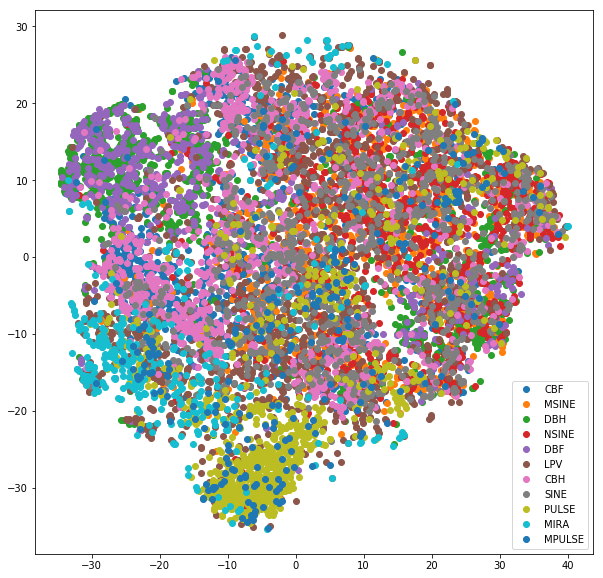

In [11]:
plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()

In [34]:
from MulticoreTSNE import MulticoreTSNE as mTSNE

In [93]:
t = mTSNE(n_components=2, perplexity=90, learning_rate=70, early_exaggeration=600, n_jobs=18, n_iter=3000)

%time embed = t.fit_transform(test_set[encod_cols].values)

CPU times: user 3min 27s, sys: 489 ms, total: 3min 27s
Wall time: 24.2 s


In [94]:
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

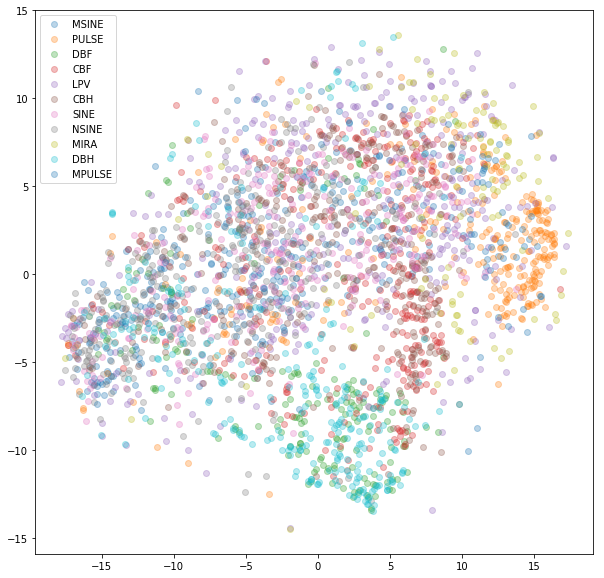

In [95]:
plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname, alpha=0.3)
    i+=1
plt.legend()